In fact, Forbes estimates that data scientists spend about 60% of their time cleaning and organizing data, so it's critical to be able to manipulate data quickly and efficiently.

In [1]:
#import library
import pandas as pd
import matplotlib.pyplot as plt

# read csv 
happiness2015 = pd.read_csv("2015.csv")
first_5 = happiness2015.head()
happiness2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
Country                          158 non-null object
Region                           158 non-null object
Happiness Rank                   158 non-null int64
Happiness Score                  158 non-null float64
Standard Error                   158 non-null float64
Economy (GDP per Capita)         158 non-null float64
Family                           158 non-null float64
Health (Life Expectancy)         158 non-null float64
Freedom                          158 non-null float64
Trust (Government Corruption)    158 non-null float64
Generosity                       158 non-null float64
Dystopia Residual                158 non-null float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB


In [2]:
# check the uniqueness per region
happiness2015['Region'].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

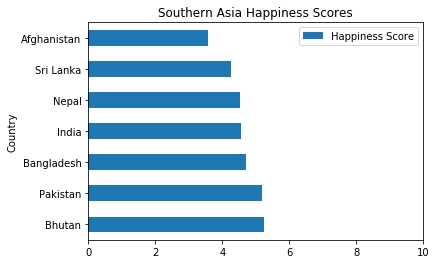

In [3]:
#lets try plotting southern asia 
so_asia = happiness2015[happiness2015['Region'] == 'Southern Asia']
so_asia.plot(x='Country', y='Happiness Score', kind='barh', title='Southern Asia Happiness Scores', xlim=(0,10))

However, we wouldn't know if the Southern Asia region is representative of the entire world unless we look at the other regions. What we really want is to create a visualization that uses one number, a summary statistic like the mean, to summarize the data for each region.

In this mission, we'll learn how to perform different kinds of aggregations, applying a statistical operation to groups of our data, and create visualizations like the one above.

### Using Loops to Aggregate Data 

In [4]:
#Create an empty dictionary named mean_happiness to store the results of this exercise.
mean_happiness = {}

#Identify each unique group in the data set
#Use the Series.unique() method to create an array of unique values for the Region column.
regions = happiness2015['Region'].unique()

#Use a for loop to iterate over the unique region values from the Region column
for r in regions: 
    
    #Assign the rows belonging to the current region to a variable named region_group.
    region_group = happiness2015[happiness2015['Region']== r]
    
    #Use the Series.mean() method to calculate the mean happiness score for region_group.
    region_mean = region_group['Happiness Score'].mean()
    
    #Assign the mean value to the mean_happiness dictionary, 
    # using the region name as the key and the mean happiness score as the value.
    mean_happiness[r] = region_mean

In [5]:
mean_happiness = {}
regions = happiness2015['Region'].unique()

for r in regions:
    #1. Split the dataframe into groups.
    region_group = happiness2015[happiness2015['Region'] == r]
    #2. Apply a function to each group.
    region_mean = region_group['Happiness Score'].mean()
    #3. Combine the results into one data structure.
    mean_happiness[r] = region_mean

As with many other common tasks, pandas has a built-in operation for this process. The groupby operation performs the "split-apply-combine" process on a dataframe, but condenses it into two steps:

Create a GroupBy object.
Call a function on the GroupBy object.
The GroupBy object, distinct from a dataframe or series object, allows us to split the dataframe into groups, but only in an abstract sense. Nothing is actually computed until a function is called on the GroupBy object.

You can think of the groupby operation like this. Imagine a dataframe as a structure made of stacking blocks in all different colors and sizes.

1. we would first create a mapping document, the GroupBy object, containing information on how to group the blocks by color and where each block is located in the original structure.

2. Once we create the mapping document, we can use it to easily rearrange the blocks into different structures. Call an aggregation function. 

3. Can call another structure 

Creating the initial mapping document, or GroupBy object, allows us to optimize our work, because we no longer have to refer back to the original dataframe. By working with the groupby operation, we make our code faster, more flexible, and easier to read.

## Creating GroupBY Objects 

In [6]:
# TO create a group by we use the DataFrame.groupby() method 
df.groupby('col')

NameError: name 'df' is not defined

In [ ]:
grouped = happiness2015.groupby('Region') 

aus_nz = grouped.get_group('Australia and New Zealand')

aus_nz

### Exploring GroupBy Objects 

In [ ]:
grouped = happiness2015.groupby('Region')
grouped.groups

Notice that the values include the index for each row in the original happiness2015 dataframe with the corresponding region name. To prove this, let's again look at the data for the Australia and New Zealand group:

In [ ]:
happiness2015.iloc[8:10]

Next, let's continue building our intuition by practicing using the groups attribute and get_group() method.

In [ ]:
#Exercise: 
grouped = happiness2015.groupby('Region')

#assign just the countries of North America to a name 
north_america = happiness2015.iloc[[4,14]]

#Use the GroupBy.get_group() method to select the data for the North America group only.
na_group = grouped.get_group('North America')

#Use the following code to compare north_america and na_group: north_america == na_group. Assign the result to equal.
equal = north_america == na_group

### Common Aggregation methods with GroupBY 

we confirmed that the values for the 'North America' group returned by grouped.groups do correspond to the countries in North_America in the happiness2015 dataframe.

A basic example of aggregation is computing the number of rows for each of the groups. We can use the GroupBy.size() method to confirm the size of each region group:

In [ ]:
grouped = happiness2015.groupby('Region')
grouped.size()

In [ ]:
# Find the mean of grouped 
means = grouped.mean()
means

You may have noticed that Region appears in a different row than the rest of the column names. Because we grouped the dataframe by region, the unique values in Region are used as the index. Up until now, we've mostly worked with dataframes with a numeric index.

In [ ]:
#Select just the Happiness Score column from grouped. Assign the result to happy_grouped.
#Use the GroupBy.mean() method to compute the mean of happy_grouped. Assign the result to happy_mean.
grouped = happiness2015.groupby('Region')

happy_grouped = grouped["Happiness Score"]

happy_mean = happy_grouped.mean()

happy_mean

### Intro to Agg(  ) Method 

what if we wanted to apply more than one kind of aggregation to a column at a time?

For example, suppose we wanted to calculate both the mean and maximum happiness score for each region. Using what we learned so far, we'd have to first calculate the mean, like we did above, and then calculate the maximum separately.

**GroupBy.agg() method can perform Both aggregations at once.** 

In [ ]:
import numpy as np
grouped = happiness2015.groupby('Region')
happy_grouped = grouped['Happiness Score']
def dif(group):
    return (group.max() - group.mean()) 

#Apply the GroupBy.agg() method to happy_grouped. Pass a list containing np.mean and np.max into the method. Assign the result to happy_mean_max.
happy_mean_max = happy_grouped.agg([np.mean, np.max])

#As noted above, passing 'mean' and 'max' into the GroupBy.agg() method will also return the same results. 
# However, for answer checking purposes, you'll have to use np.mean and np.max.

#created a custom function named dif to calculate the difference between the mean and maximum values. 
#Pass dif into the GroupBy.agg() method. Assign the result to mean_max_dif.
mean_max_dif = happy_grouped.agg(dif)

### 10. Computing Multiple and Custom Aggregations with the Agg( ) Method

In the last exercise, we learned we can use the GroupBy.agg() method to:

    - Perform more than one aggregation at once.
    - Compute custom aggregations.
To compute multiple aggregations at once, we passed a list of the function names into the agg method:

In [ ]:
import numpy as pd 
grouped = happiness2015.groupby('Region')
#select column from your groupby
happy_grouped = grouped['Happiness Score']

#use agg() to call multiple functions 
happy_mean_max = happy_grouped.agg([np.mean, np.max])

Our result is a dataframe containing both the mean and maximum happiness scores for each region. Note that the columns are named for the functions themselves.

In [ ]:
#custom function to aggregate the data: 
def dif(group):
    return(group.max() - group.mean())
happy_grouped.agg(dif)

Above, we calculated the difference between the mean and maximum values for each region. Because the agg() method allows us to create custom aggregation functions, it gives us much more flexibility in how we can transform our data.

In [ ]:
# same computation as above but in a different way. 
happiness2015.groupby("Region")['Happiness Score'].agg(dif)

Both approaches will return the same result. However, if you plan on computing multiple aggregations with the same GroupBy object, it's recommended to save the object to a variable first.

In [ ]:
#Exercise: 
happiness_means = happiness2015.groupby('Region')['Happiness Score'].mean()

happiness_means

The Index is Region and Happiness is the value

### 11 Aggregation with Pivot Tables 

Index and values are actually arguments used in another method used to aggregate data - the DataFrame.pivot_table() method.

The df.pivot_tbale() can perform the same inds of aggregation as the df.groupby meothod and make the code for complex aggregations easier to read. 

In [ ]:
happiness2015.pivot_table(values='Happiness Score', index='Region', aggfunc=np.mean)

In [ ]:
#Compare the happiness score of the different regions and plot. 
#                                                        #add margins to true to get the sum of all regions
pv_happiness = happiness2015.pivot_table(values='Happiness Score', index='Region', aggfunc=np.mean, margins=True)

pv_happiness.plot(kind='barh', title='Mean Happiness Scores by Region', xlim=(0,10), legend=False)

world_mean_happiness = happiness2015['Happiness Score'].mean()

The pivot_table method also allows us to aggregate multiple columns and apply multiple functions at once.

### 12 Aggregating Multiple Columns and Functions with Pivot Tables 

We can aggregate both the 'Happiness Score' and 'Family' columns in happiness2015 and grouby the Region column: 

In [ ]:
happiness2015.pivot_table(['Happiness Score', 'Family'], 'Region')

To apply multiple functions, we can pass a list of the functions into the aggfunc parameter:

In [ ]:
happiness2015.pivot_table(values='Happiness Score', index='Region', aggfunc=[np.mean, np.min, np.max], margins=True)

In [ ]:
#group by region and select happiness score and family
grouped = happiness2015.groupby('Region')[['Happiness Score', 'Family']]

happy_family_stats = grouped.agg([np.min, np.max, np.mean])

pv_happy_family_stats= happiness2015.pivot_table(['Family', 'Happiness Score'], 'Region', aggfunc=[np.min, np.max, np.mean], margins=True)

In [ ]:
grouped

In [ ]:
happy_family_stats

In [ ]:
pv_happy_family_stats

In this mission, we learned how to use the groupby operation and the df.pivot_table() method for aggregation. 

# COMBINING DATA With Pandas 

In the last mission, we worked with just one data set, the 2015 World Happiness Report, to explore data aggregation. However, it's very common in practice to work with more than one data set at a time.

Often, you'll find that you need additional data to perform analysis or you'll find that you have the data, but need to pull it from mulitiple sources. In this mission, we'll learn a couple of different techniques for combining data using pandas to easily handle situations like these.

We'll use what we learned in the last mission to analyze the 2015, 2016, and 2017 World Happiness Reports. Specifically, we'll look to answer the following question:

Did world happiness increase, decrease, or stay about the same from 2015 to 2017?

As a reminder, these reports assign each country a happiness score based on a poll question that asks respondents to rank their life on a scale of 0 - 10, so "world happiness" refers to this definition specifically.

In [9]:
# add library 
import pandas as pd

#bring in csv files into pandas 
happiness2015 = pd.read_csv("2015.csv")
happiness2016 = pd.read_csv("World_Happiness_2016.csv")
happiness2017 = pd.read_csv("World_Happiness_2017.csv")

#add extra column for the year of each dataset 
happiness2015['Year']= 2015
happiness2016['Year']= 2016
happiness2017['Year']= 2017

### Combing Dataframes with the Concat Function

In [10]:
#Example 
head_2015 = happiness2015[['Country', 'Happiness Score', 'Year']].head(3)
head_2015

,Country,Happiness Score,Year
0,Switzerland,7.587,2015
1,Iceland,7.561,2015
2,Denmark,7.527,2015


In [11]:
head_2016 = happiness2016[['Country','Happiness Score', 'Year']].head(3)
head_2016

,Country,Happiness Score,Year
0,Denmark,7.526,2016
1,Switzerland,7.509,2016
2,Iceland,7.501,2016


In [12]:
# EXERCISE: 

head_2015 = happiness2015[['Country','Happiness Score', 'Year']].head(3)
head_2016 = happiness2016[['Country','Happiness Score', 'Year']].head(3)

#use the concat for axis of 0 and axis of 1
concat_axis0 = pd.concat([head_2015, head_2016], axis=0)
concat_axis1 = pd.concat([head_2015, head_2016], axis=1)


#concat_axis0
concat_axis1

,Country,Happiness Score,Year,Country,Happiness Score,Year
0,Switzerland,7.587,2015,Denmark,7.526,2016
1,Iceland,7.561,2015,Switzerland,7.509,2016
2,Denmark,7.527,2015,Iceland,7.501,2016


For this reason, when you use the concat() function to combine dataframes with the same shape and index, you can think of the function as "gluing" dataframes together.

Let's confirm the concat() function's behavior when we combine dataframes that don't have the same shape in the next exercise.

In [13]:
# Example we will work with the following subset: 
head_2015 = happiness2015[['Year','Country','Happiness Score', 'Standard Error']].head(4)

head_2015

,Year,Country,Happiness Score,Standard Error
0,2015,Switzerland,7.587,0.03411
1,2015,Iceland,7.561,0.04884
2,2015,Denmark,7.527,0.03328
3,2015,Norway,7.522,0.03880


In [14]:
# Example subset #2
head_2016 = happiness2016[['Country','Happiness Score', 'Year']].head(3)
head_2016

,Country,Happiness Score,Year
0,Denmark,7.526,2016
1,Switzerland,7.509,2016
2,Iceland,7.501,2016


Notice in the subsets above that head_2015 contains one column that head_2016 does not - the Standard Error column.

In [15]:
# Exercise: 
head_2015 = happiness2015[['Year','Country','Happiness Score', 'Standard Error']].head(4)
head_2016 = happiness2016[['Country','Happiness Score', 'Year']].head(3)
concat_axis0 = pd.concat([head_2015, head_2016])

concat_axis0

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


,Country,Happiness Score,Standard Error,Year
0,Switzerland,7.587,0.03411,2015
1,Iceland,7.561,0.04884,2015
2,Denmark,7.527,0.03328,2015
3,Norway,7.522,0.03880,2015
0,Denmark,7.526,NaN,2016
1,Switzerland,7.509,NaN,2016
2,Iceland,7.501,NaN,2016


### Combining Dataframes with different Shapes Using the Concat Function

Instead, the function combined the data according to the corresponding column names:

    Notice how the names of the country repeat but because the Standard Error column didnt exist in head_2016, NAN values were crafted to signify those values that are missing. 
    
    By default, the concat function will keep ALL of the data, no matter if missing values are created.

Luckily, the concat function has a parameter, ignore_index, that can be used to clear the existing index and reset it in the result.

In [16]:
#EXERCISE: 
#Use the pd.concat() function to combine head_2015 and head_2016 along axis = 0 again. This time, however, set the ignore_index parameter to True to reset the index in the result. 

concat_update_index = pd.concat([head_2015, head_2016], axis=0, ignore_index=True)

concat_update_index

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


,Country,Happiness Score,Standard Error,Year
0,Switzerland,7.587,0.03411,2015
1,Iceland,7.561,0.04884,2015
2,Denmark,7.527,0.03328,2015
3,Norway,7.522,0.03880,2015
4,Denmark,7.526,NaN,2016
5,Switzerland,7.509,NaN,2016
6,Iceland,7.501,NaN,2016


### Joining Dataframes with the Merge Function

we'll explore the pd.merge() function - a function that can execute high performance database-style joins.

Note that unlike the concat function, the merge function only combines dataframes horizontally (axis=1) and can only combine two dataframes at a time. However, it can be valuable when we need to combine very large dataframes quickly and provides more flexibility in terms of how data can be combined, as we'll see in the next couple of examples.

With the **merge(  ) function**, we'll combine dataframes on a **key**, a shared index or column. When choosing a key, it's good practice to use keys with unique values to avoid duplicating data.

**You can think of keys as creating a link from one dataframe to another using the common values or indexes.** 

In [17]:
#Exercise: 
#create variables for a small df 
three_2015 = happiness2015[['Country','Happiness Rank','Year']].iloc[2:5]
three_2016 = happiness2016[['Country','Happiness Rank','Year']].iloc[2:5]

#use pd.merge() function to join 2 dfs on country
merged = pd.merge(three_2015, three_2016, on='Country')
merged

,Country,Happiness Rank_x,Year_x,Happiness Rank_y,Year_y
0,Norway,4,2015,4,2016


### Joining on Columns with the Merge Function
In the Exercise above since we used the merge( ) key on Country column, the function looked to match elements in the country column in Both Dfs. 

Norway was the only country that appeared in the DF that were a match. 

**This way of combining, or joining, data is called an inner join. An inner join returns only the intersection of the keys, or the elements that appear in both dataframes with a common key.**

- Inner: only includes elements that appear in both dataframes with a common key

- Outer: includes all data from both dataframes

- Left: includes all of the rows from the "left" dataframe along with any rows from the "right" dataframe with a   common key; the result retains all columns from both of the original dataframes

- Right: includes all of the rows from the "right" dataframe along with any rows from the "left" dataframe with a common key; the result retains all columns from both of the original dataframes

Outer Join is basically what we combined data using concat function, it kept all the data from all dataframes, no matter if missing values were created. 

In [18]:
# Exercise: 
three_2015 = happiness2015[['Country','Happiness Rank','Year']].iloc[2:5]
three_2016 = happiness2016[['Country','Happiness Rank','Year']].iloc[2:5]
merged = pd.merge(left=three_2015, right=three_2016, on='Country')

# update merged to use a left join
merged_left = pd.merge(left=three_2015, right=three_2016, on='Country', how='left')

merged_left

,Country,Happiness Rank_x,Year_x,Happiness Rank_y,Year_y
0,Denmark,3,2015,NaN,NaN
1,Norway,4,2015,4.0,2016.0
2,Canada,5,2015,NaN,NaN


In [19]:
#Exercise: 
# Update merged_left so that the left parameter equals three_2016 and the right parameter equals three_2015. 
merged_left_updated = pd.merge(left=three_2016, right=three_2015, on='Country', how='left')
merged_left_updated

,Country,Happiness Rank_x,Year_x,Happiness Rank_y,Year_y
0,Iceland,3,2016,NaN,NaN
1,Norway,4,2016,4.0,2015.0
2,Finland,5,2016,NaN,NaN


### Left Joins with the Merge Function

Changing the join type from an inner join to a left join resulted in a dataframe with more rows and created NaNs.

When using a left join, interchanging the dataframes assigned to the left and right parameters changes the results.

Since the Country column was used as the key, only countries that appear in BOTH dataframes have a value in every column. "Norway" was the only value in the Country column in BOTH dataframes, so it's the only row with a value in every column.

You may have also noticed above that the merge function added a suffix of either _x or _y to columns of the same name to distinguish between them.

In [20]:
# EXERCISE 
# Add the suffixes using the suffixes parameter 
merged_suffixes = pd.merge(left=three_2015, right=three_2016, how='left', on='Country', suffixes=('_2015', '_2016'))


merged_updated_suffixes = pd.merge(left=three_2016, right=three_2015, how='left', on='Country', 
suffixes=('_2016', '_2015'))

merged_suffixes

,Country,Happiness Rank_2015,Year_2015,Happiness Rank_2016,Year_2016
0,Denmark,3,2015,NaN,NaN
1,Norway,4,2015,4.0,2016.0
2,Canada,5,2015,NaN,NaN


### Join on Index with the Merge Function 

We'll join happiness2015 and happiness2016 on **index using an inner join**, so that the result contains only the elements in the key that appear in BOTH dataframes.

When we merge on index the result will contain only common indexes. 

In [21]:
#Exercise: 
four_2015 = happiness2015[['Country','Happiness Rank','Year']].iloc[2:6]
three_2016 = happiness2016[['Country','Happiness Rank','Year']].iloc[2:5]

# change the join type to left join
merge_index_left = pd.merge(left = four_2015,right = three_2016, how = 'left', 
left_index = True, right_index = True, suffixes = ('_2015','_2016'))

merge_index_left

,Country_2015,Happiness Rank_2015,Year_2015,Country_2016,Happiness Rank_2016,Year_2016
2,Denmark,3,2015,Iceland,3.0,2016.0
3,Norway,4,2015,Norway,4.0,2016.0
4,Canada,5,2015,Finland,5.0,2016.0
5,Finland,6,2015,NaN,NaN,NaN


### Combine Data and Create a Visualization 

**Did world happiness increase, decrease, or stay about the same from 2015 to 2017?**

 First, let's rename the Happiness.Score column so it matches the column name in happiness2015 and happiness2016:

In [22]:
happiness2017.rename(columns={'Happiness.Score': 'Happiness Score'}, inplace=True)
import numpy as np
import matplotlib.pyplot as plt

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


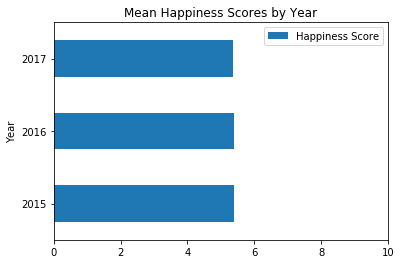

In [23]:
#EXERCISE: 
#Use either the pd.concat() function or the pd.merge() function to combine happiness2015, happiness2016, and happiness2017
combined = pd.concat([happiness2015, happiness2016, happiness2017])

#use the df.pivot_table() method to create a pivot table from the combined df.
pivot_table_combined = combined.pivot_table(index='Year', values='Happiness Score', aggfunc=np.mean)

#create a bar chart 
pivot_table_combined.plot(kind='barh', title = 'Mean Happiness Scores by Year', xlim=(0,10))

# Transforming Data with Pandas 

Challenge: 

The columns below contains the estimated extent to which each factor contributes to the happiness score:

- Economy (GDP per Capita)
- Family
- Health (Life Expectancy)
- Freedom
- Trust (Government Corruption)
- Generosity

**Which of the factors above contribute the most to the happiness score?**

Let's start by renaming some of the columns in happiness2015.

In [24]:
import numpy as pd
import pandas as pd 
import matplotlib.pyplot as plt

In [25]:
#Exercise 
#rename columns to have simple text for understanding
mapping = {'Economy (GDP per Capita)': 'Economy', 'Health (Life Expectancy)': 'Health', 'Trust (Government Corruption)': 'Trust' }

#pass mapping dictionary into the df.rename adn set axis to 1
happiness2015 = happiness2015.rename(mapping, axis=1)

### Apply a Function Element-wise Using the Map and Apply Method

In [26]:
happiness2015.head(3)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015


Recall that each number represents the extent to which each factor contributes to the happiness score.

However, not only is this definition a little hard to understand, but it can also be challenging to analyze all of these numbers across multiple columns. Instead, we can first convert these numbers to categories that indicate whether the factor has a high impact on the happiness score or a low impact using the following function:

In [27]:
# convert function to high or low impact using a function
def label(element):
    if element > 1: 
        return 'High'
    else: 
        return 'Low'

Using 

Series.map(   )   method 

        Series.map(function_name)

Series.apply(   )   method
        
        Series.apply(function_name)
        
Note that these methods both take a function as a parameter. Because we're using the function as a parameter, we pass it into the function without the parentheses. For example, if we were working with a function called transform, we'd pass it into the apply() method as follows:

In [28]:
# EXERCISE 
def label(element):
    if element > 1: 
        return 'High'
    else: 
        return 'Low'
#add series.map() method to apply label function to the Economy
economy_impact_map = happiness2015['Economy'].apply(label)    
    
#add series.apply() ''
economy_impact_apply = happiness2015['Economy'].apply(label)
economy_impact_apply

#check to see if the methods produce the same result
equal = economy_impact_map.equals(economy_impact_apply)


#economy_impact_apply.head(3)
equal

True

#### Continued 

We recommend creating a new column, in case you need to reference the original values. Let's do that next:

In [29]:
#create a new column, in case you need to reference the original values. 
def label(element): 
    if element > 1:
        return 'High'
    else: 
        return 'Low'
#
happiness2015['Economy Impact'] = happiness2015['Economy'].map(label)

To create the Economy Impact column, map() and apply() iterate through the Economy column and pass each value into the label function. The function evaluates which range the value belongs to and assigns the corresponding value to the element in the new column.



What if instead we allowed that number to be passed into the function as an argument?

In [33]:
# create a function that allows a number that we want to hit to be considered High such as 0.8
def label(element, x):
    if element > x:
        return 'High'
    else: 
        return 'Low'
#use the apply method to apply label to the Economy column and set the x argument to 0.8. 
economy_impact_apply = happiness2015['Economy'].apply(label, x=0.8)

### Apply a Function Element-wise to Multiple Columns Using Applymap Method

Pandas already has a method that can apply functions element-wise to multiple columns at once - the DataFrame.applymap() method.

In [36]:
#EXERCISE 
#use the function to categorize high and low 
def label(element):
    if element > 1:
        return 'High'
    else:
        return 'Low'
#create a list of named factors that we will be analyzing 
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity']

#generate a df.applymap() method for all factors 
factors_impact = happiness2015[factors].applymap(label)

factors_impact.head()

,Economy,Family,Health,Freedom,Trust,Generosity
0,High,High,Low,Low,Low,Low
1,High,High,Low,Low,Low,Low
2,High,High,Low,Low,Low,Low
3,High,High,Low,Low,Low,Low
4,High,High,Low,Low,Low,Low


We can see from the results that, according to our definition, the Economy and Family columns had a high impact on the happiness scores of the first five countries.

We have created a new dataframe of high and low comparisons between countries.

### Apply Functions along an Axis using the Apply Method

In [37]:
# Use the df.apply() method to calculate the number of  high and low values of each column. 
factors_impact.apply(pd.value_counts)

,Economy,Family,Health,Freedom,Trust,Generosity
High,66,89,2,NaN,NaN,NaN
Low,92,69,156,158.0,158.0,158.0


Notice that we used the df.apply() method to transform multiple columns. This is only possible because the pd.value_counts function operates on a series. If we tried to use the df.apply() method to apply a function that works element-wise to multiple columns, we'd get an error

In [41]:
#EXERCISE: 
#Create a function that calculates the percentage of 'High' and 'Low' values in each column.
# Create a function named v_counts that accepts one parameter called col.
def v_counts(col):
# Use the Series.value_counts() method to calculate the value counts for col. Assign the result to num.
    num = col.value_counts()
# Use the Series.size attribute to calculate the number of rows in the column. Assign the result to den.
    den = col.size
# Divide num by den and return the result.
    return num/den

#Use the df.apply() method to apply the v_counts function to all of the columns in factors_impact.
v_counts_pct = factors_impact.apply(v_counts)

v_counts_pct

,Economy,Family,Health,Freedom,Trust,Generosity
High,0.417722,0.563291,0.012658,NaN,NaN,NaN
Low,0.582278,0.436709,0.987342,1.0,1.0,1.0
